In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [102]:
#link to collab notebook by ian https://colab.research.google.com/drive/1EiIOylUoyYlacFik1VgGPlvxKta88T23?usp=sharing#scrollTo=WFoZMAhBSjYD 
#Do Filling Missing Values here
california = fetch_california_housing()
df = pd.DataFrame(california.data, columns=california.feature_names)
target=pd.DataFrame(california.target)

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [88]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [23]:
df.isnull().sum()
#After some deliberation we noticed that there were no missing values so we randomly set sone NaN values then fixed them

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [24]:
ix = [(row, col) for row in range(df.shape[0]) for col in range(df.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    df.iat[row, col] = np.nan

In [25]:
df.isnull().sum()

MedInc        2046
HouseAge      2066
AveRooms      2103
AveBedrms     1997
Population    2067
AveOccup      2093
Latitude      2074
Longitude     2066
dtype: int64

In [26]:
df.fillna(df.mean(), inplace=True)

In [27]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


there are 20640 instances in each column hence no null values

we skipped hot encoding since all data was of the same dtype(float)

In [75]:
#Do feature selection Below this

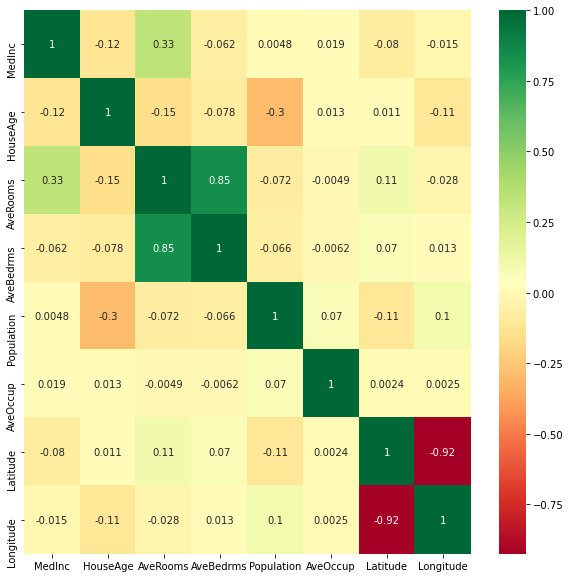

In [74]:
#heatmap to show colinnearity in columns
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

we don't drop any feature since they have low corellation apart from averagebedrooms and averagerooms which we chose to keep

In [78]:
#Do feature extraction below this

In [171]:
#Standardize Features

# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the features and transform
X_std = sc.fit_transform(df)

In [177]:
# Create a pca object
pca_var=PCA(0.9)

# Fit the PCA and transform the data
pc_s= pca_var.fit_transform(X_std)

#find the number of n components needed
pca_var.n_components_

5

In [179]:
#Merge PCA data columns with the target data
pca_data=pd.DataFrame(pc_s,columns=['PC1','PC2','PC3','PC4','PC5'])
final_data=pd.concat([pca_data,target],axis=1)

final_data

,PC1,PC2,PC3,PC4,PC5,0
0,1.882704,-0.503362,-0.314134,-2.555093,0.128040,4.526
1,1.371120,-0.121406,1.905258,-1.872984,-0.267430,3.585
2,2.086868,-0.501136,-0.937245,-2.100133,0.370032,3.521
3,1.575801,-1.239495,-1.025957,-1.286721,0.318956,3.413
4,1.591206,-1.345264,-1.249171,-0.450778,0.293612,3.422
...,...,...,...,...,...,...
20635,1.386779,-1.296137,0.054262,1.063026,-0.163868,0.781
20636,1.875219,-0.671533,0.155700,0.644612,-0.208383,0.771
20637,1.402357,-1.096426,0.567135,1.090397,-0.326347,0.923
20638,1.542943,-1.059408,0.365472,0.968799,-0.323242,0.847
